In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
!ls

10km.CSV       21km.CSV       5km.CSV        MEC_Race.ipynb


In [14]:
column_names = ["e", "place", "name", "div", "time", "bib", "d", "c", "b", "a", "pace_km", "pace_miles"]
five =  pd.read_csv("5km.CSV", names=column_names)
ten =  pd.read_csv("10km.CSV", names=column_names)
half =  pd.read_csv("21km.CSV", names=column_names)

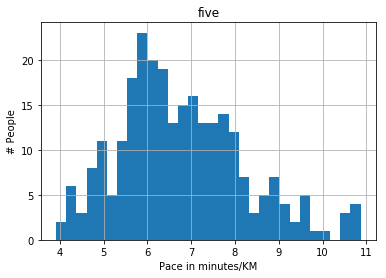

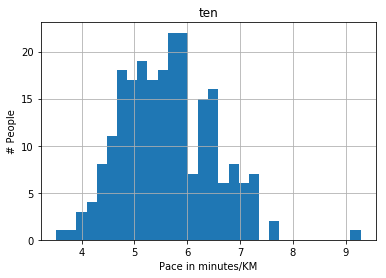

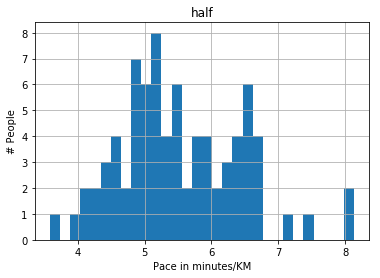

In [23]:
races = [five, ten, half]
races_str = ["5KM", "10KM", "21"]

for race, race_str in zip(races, races_str):
    new = race["pace_km"].str.split(":", n = 1, expand = True)
    new.columns = ["m", "s"]
    new.s = pd.to_numeric(new.s)
    new.m = pd.to_numeric(new.m)
    race["pace_s"] = new.m * 60 + new.s
    race["pace_m"] = race.pace_s / 60.0
    ax = race["pace_m"].hist(bins=30)
    ax.set_title(race_str)
    ax.set_ylabel("# People")
    ax.set_xlabel("Pace in minutes/KM")
    plt.show()